In [132]:
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn import  datasets, metrics, tree 
from sklearn.model_selection import train_test_split

df = pd.read_csv('./bioresponse.csv')
df

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,...,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,...,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,...,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,...,0,0,0,0,0,0,0,0,0,0


In [133]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, ~df.columns.isin([ 'Activity'])], 
                                                    df.loc[:, 'Activity'], test_size = 0.25, random_state = 1)

In [7]:
%matplotlib inline

In [134]:
def assesment(y_test, predictions):
    acc = round(metrics.accuracy_score(y_test, predictions), 3)
    prec = round(metrics.precision_score(y_test, predictions), 3)
    rec = round(metrics.recall_score(y_test, predictions), 3)
    f1 = round(metrics.f1_score(y_test, predictions), 3)
    ll = round(metrics.log_loss(y_test, predictions), 3)
    print('-'*15, '\n Accuracy:', acc, '\n', 'Precision:', prec,'\n', 'Recall:', rec, '\n', 'F1 score:', f1, '\n',
         'Log loss:', ll, '\n', '-'*15)

# Decision tree

In [179]:
clf = tree.DecisionTreeClassifier(random_state=1, max_depth = 3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [180]:
predictions = clf.predict(X_test)
probas = clf.predict_proba(X_test)
assesment(y_test, predictions)

--------------- 
 Accuracy: 0.773 
 Precision: 0.776 
 Recall: 0.825 
 F1 score: 0.8 
 Log loss: 8.185 
 ---------------


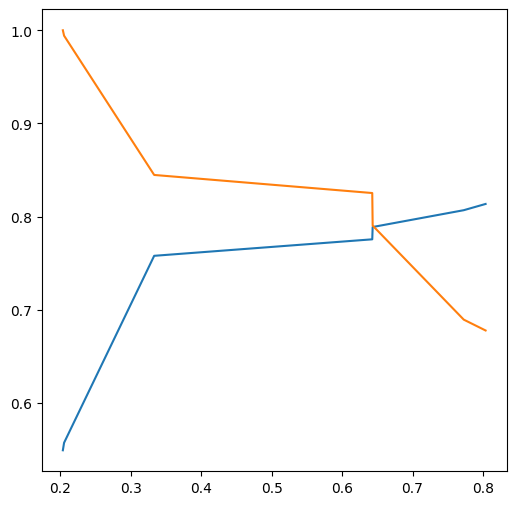

In [181]:
from sklearn.metrics import precision_recall_curve
 
precs, recs, threshs = precision_recall_curve(y_test, probas[:, 1])

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(threshs, precs[:-1], label='Precision')
ax.plot(threshs, recs[:-1], label='Recall')


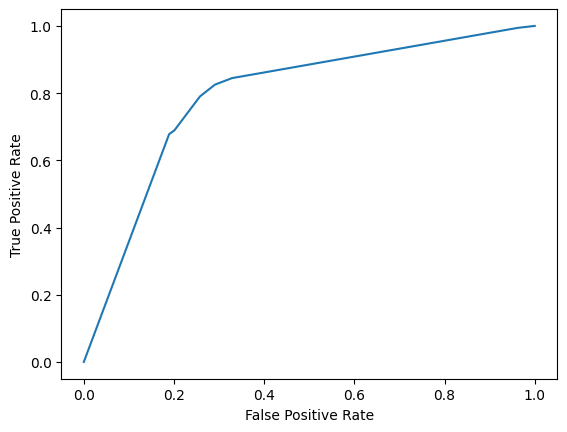

In [182]:
fpr, tpr, _ = metrics.roc_curve(y_test, probas[:,1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Deep Decision Tree

In [175]:
clf2 = tree.DecisionTreeClassifier(random_state=1, max_depth = 65)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=65, random_state=1)

In [176]:
predictions = clf2.predict(X_test)
probas = clf2.predict_proba(X_test)
assesment(y_test, predictions)

--------------- 
 Accuracy: 0.712 
 Precision: 0.741 
 Recall: 0.732 
 F1 score: 0.736 
 Log loss: 10.375 
 ---------------


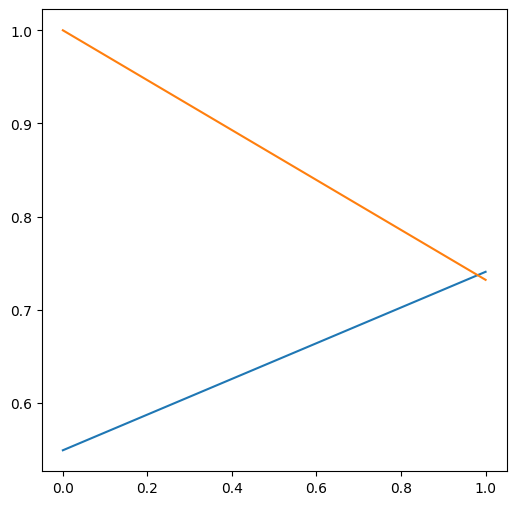

In [177]:
precs, recs, threshs = precision_recall_curve(y_test, probas[:, 1])

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(threshs, precs[:-1], label='Precision')
ax.plot(threshs, recs[:-1], label='Recall')


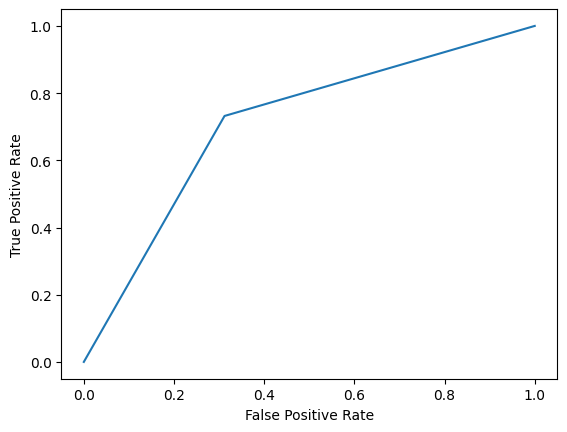

In [178]:
fpr, tpr, _ = metrics.roc_curve(y_test, probas[:,1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# RF shallow

In [48]:
from sklearn.ensemble import RandomForestClassifier

clf3 = RandomForestClassifier(max_depth = 3, random_state = 1)
clf3.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

In [172]:
predictions = clf3.predict(X_test)
probas = clf3.predict_proba(X_test)
assesment(y_test, predictions)

--------------- 
 Accuracy: 0.713 
 Precision: 0.726 
 Recall: 0.767 
 F1 score: 0.746 
 Log loss: 10.337 
 ---------------


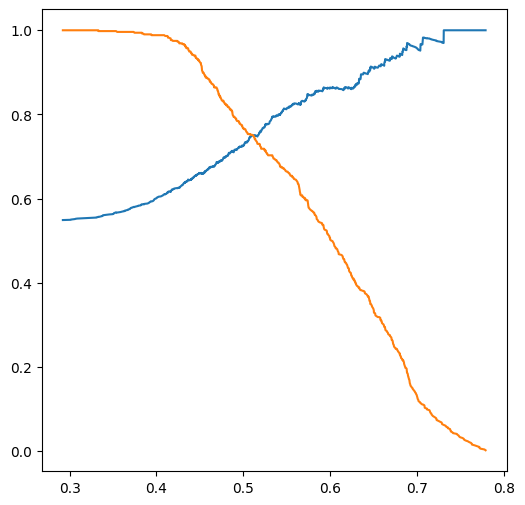

In [173]:
precs, recs, threshs = precision_recall_curve(y_test, probas[:,1])

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(threshs, precs[:-1], label='Precision')
ax.plot(threshs, recs[:-1], label='Recall')


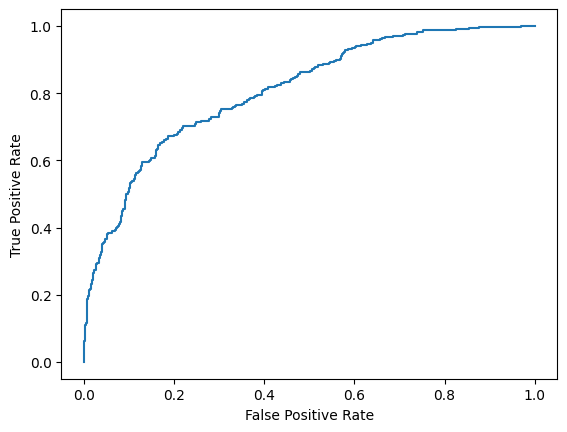

In [174]:
fpr, tpr, _ = metrics.roc_curve(y_test, probas[:,1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# RF deep

In [56]:
clf4 = RandomForestClassifier(max_depth = 65, random_state = 1)
clf4.fit(X_train, y_train)

RandomForestClassifier(max_depth=65, random_state=1)

In [166]:
predictions = clf4.predict(X_test)
probas = clf4.predict_proba(X_test)
assesment(y_test, predictions)

--------------- 
 Accuracy: 0.591 
 Precision: 0.576 
 Recall: 0.967 
 F1 score: 0.722 
 Log loss: 14.756 
 ---------------


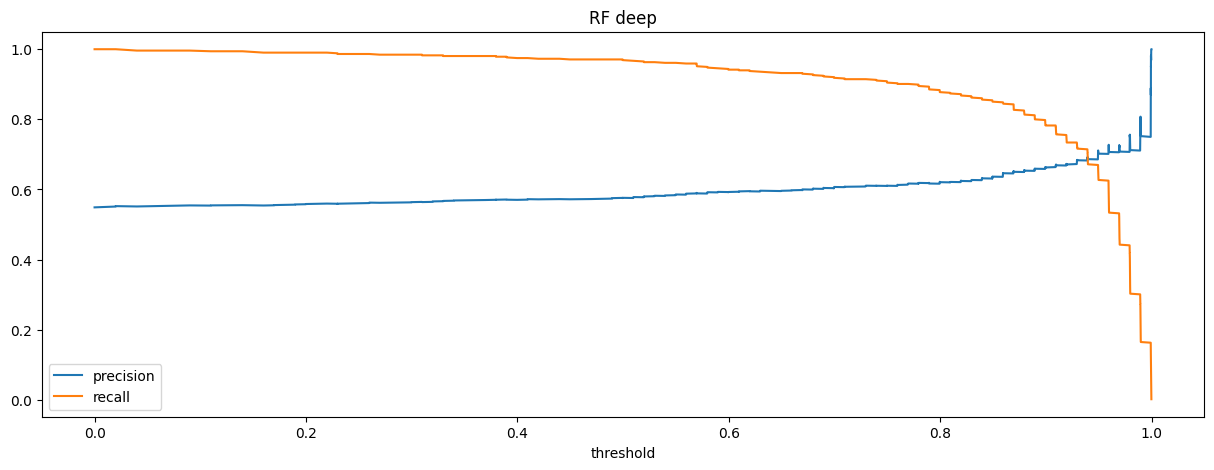

In [169]:
precs, recs, threshs = precision_recall_curve(y_test, probas[:,1])

plt.figure(figsize=(15, 5))


plt.plot(threshs, precs[:-1], label="precision")
plt.plot(threshs, recs[:-1], label="recall")
plt.xlabel("threshold")
plt.title('RF deep')
plt.legend()

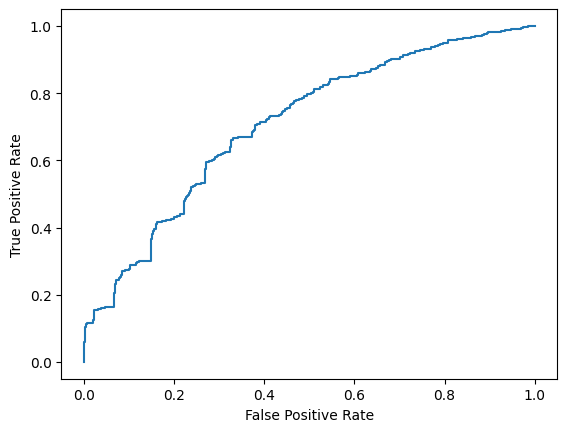

In [170]:
fpr, tpr, _ = metrics.roc_curve(y_test, probas[:,1])
roc_display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Avoiding _false negative_ classifier

The higher recall the better a model avoids false negative predictions (II type), that's why we give classes weights. This way of classification sacrifices accuracy and precision of the models for the best recall.

In [96]:
clf4 = RandomForestClassifier(max_depth = 65, random_state = 1, class_weight = {0: 0.01, 1: 10})
clf4.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.01, 1: 10}, max_depth=65,
                       random_state=1)

In [97]:
predictions = clf4.predict(X_test)
assesment(y_test, predictions)

--------------- 
 Accuracy: 0.591 
 Precision: 0.576 
 Recall: 0.967 
 F1 score: 0.722 
 Log loss: 14.756 
 ---------------
